## Problem Statement
<br>
A Chinese automobile company <b>Geely</b> Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")
pd.set_option('display.max_columns', 200)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# removing car ID and car name 
df = df.drop(columns=["car_ID","CarName"])

In [4]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Visualizing numerical Data

<Figure size 1152x1152 with 0 Axes>

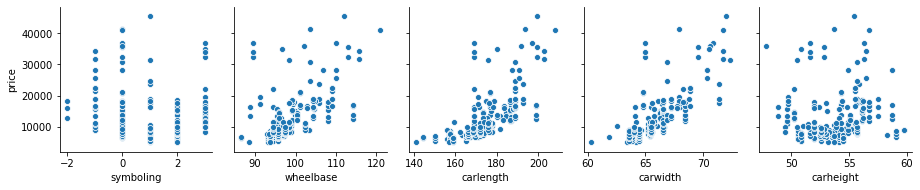

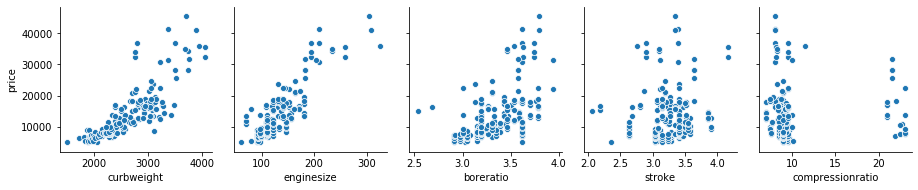

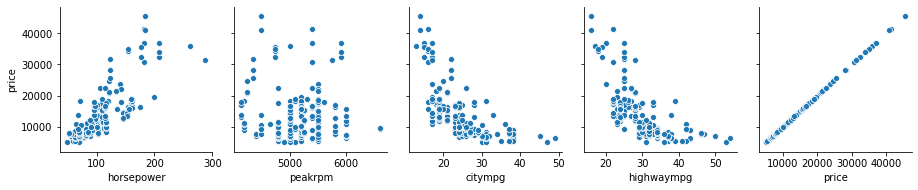

In [5]:
# Visualizing numerical Data to find relations of price with other 
num_var = list(df.describe().columns)
numericalDf = df[num_var]

plt.figure(figsize=(16, 16))
sns.pairplot(numericalDf,y_vars=["price"],x_vars=num_var[0:5])
sns.pairplot(numericalDf,y_vars=["price"],x_vars=num_var[5:10])
sns.pairplot(numericalDf,y_vars=["price"],x_vars=num_var[10:15])
plt.show()

# features that showing somewhat linear relation with price - wheelbase, carwidth, curbweight, enginesize,horsepwer,citympg
# and highwaympg

## Visualizing Categorical Data

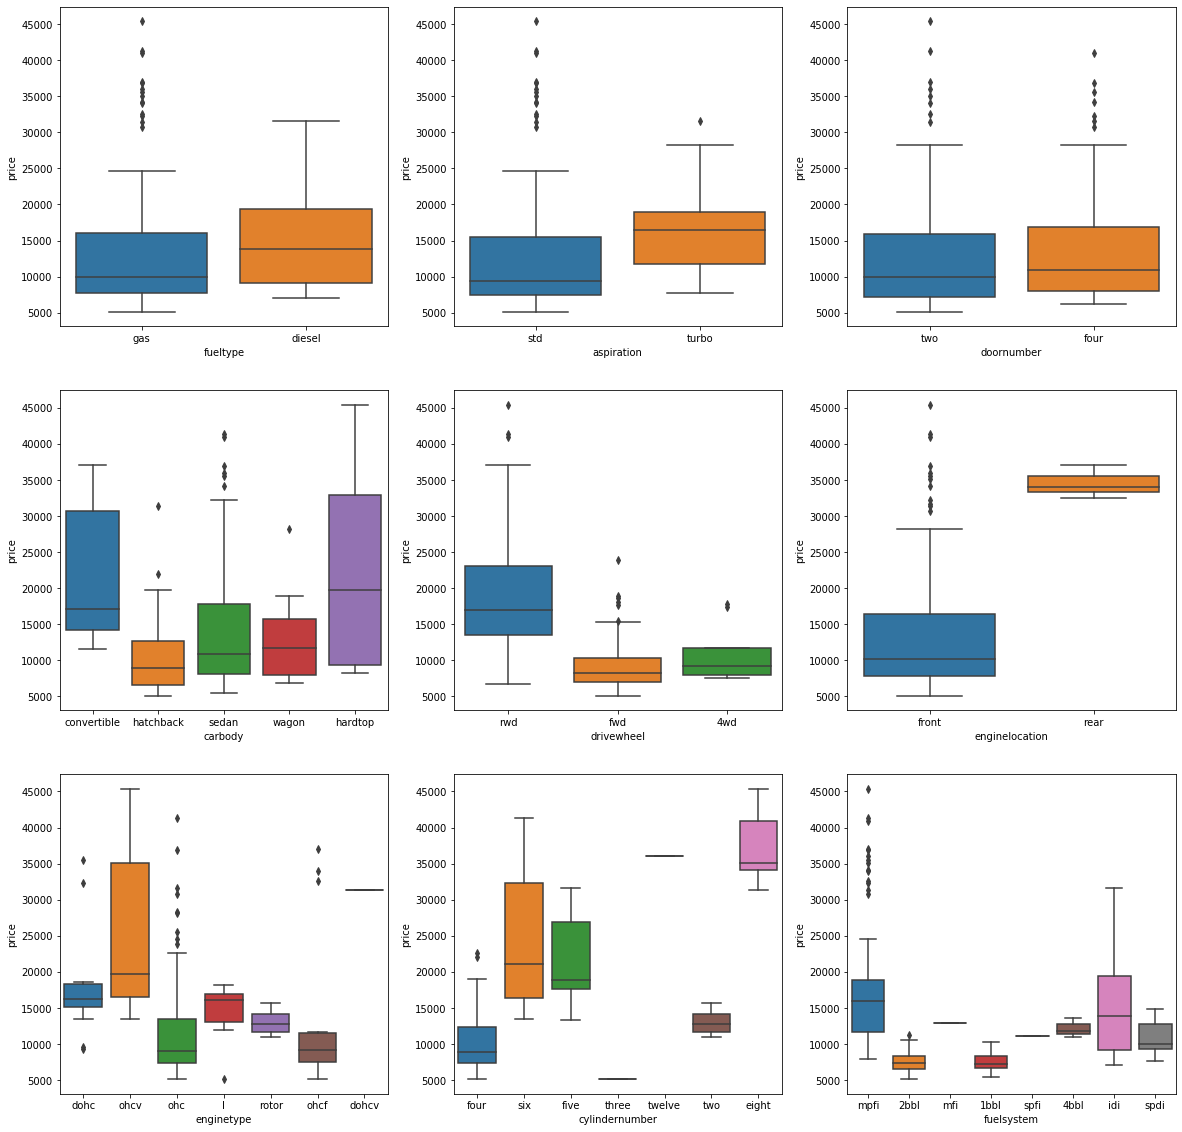

In [6]:
x_cat=["fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"]
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(data=df,x=x_cat[0],y="price")
plt.subplot(3,3,2)
sns.boxplot(data=df,x=x_cat[1],y="price")
plt.subplot(3,3,3)
sns.boxplot(data=df,x=x_cat[2],y="price")

plt.subplot(3,3,4)
sns.boxplot(data=df,x=x_cat[3],y="price")
plt.subplot(3,3,5)
sns.boxplot(data=df,x=x_cat[4],y="price")
plt.subplot(3,3,6)
sns.boxplot(data=df,x=x_cat[5],y="price")

plt.subplot(3,3,7)
sns.boxplot(data=df,x=x_cat[6],y="price")
plt.subplot(3,3,8)
sns.boxplot(data=df,x=x_cat[7],y="price")
plt.subplot(3,3,9)
sns.boxplot(data=df,x=x_cat[8],y="price")

# Observations
# Categories having significant effects on price - carbody , aspiration, enginelocation, drivewheel, enginetype , cylindernumber,fuelsystem

## Data preparation

In [7]:
# mapping binary categorical variable

df["fueltype"] = df["fueltype"].map({"gas":1,"diesel":0})
df["aspiration"] = df["aspiration"].map({"std":1,"turbo":0})
df["doornumber"] = df["doornumber"].map({"two":1,"four":0})
df["enginelocation"] = df["enginelocation"].map({"front":1,"rear":0})

In [8]:
# Creating dummy variables

carbody = pd.get_dummies(df["carbody"],prefix="carbody",drop_first=True)
drivewheel = pd.get_dummies(df["drivewheel"],prefix="drivewheel",drop_first=True)
enginetype = pd.get_dummies(df["enginetype"],prefix="enginetype",drop_first=True)
cylindernumner = pd.get_dummies(df["cylindernumber"],prefix="cylindernumber",drop_first=True)
fuelsystem = pd.get_dummies(df["fuelsystem"],prefix="fuelsystem",drop_first=True)

df = pd.concat([df,carbody,drivewheel,enginetype,cylindernumner,fuelsystem],axis=1);

df.drop(columns=["carbody","drivewheel","enginetype","cylindernumber","fuelsystem"],inplace=True)

In [9]:
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
# Observing correlation of variables
df.corr()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
symboling,1.000000,0.194311,0.059866,0.664073,-0.212471,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,0.168845,0.435648,-0.378341,-0.298243,0.102839,-0.076381,0.009347,-0.133979,-0.082855,0.037513,-0.013597,0.245950,-0.090188,-0.034161,-0.000238,0.065707,-0.047012,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
fueltype,0.194311,1.000000,0.401397,0.191491,-0.040070,-0.308346,-0.212679,-0.233880,-0.284631,-0.217275,-0.069594,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679,-0.018635,0.202093,-0.185623,-0.028183,0.090342,-0.122035,0.023020,-0.268163,-0.020584,0.092384,0.085556,0.046383,-0.213527,0.020184,0.068594,0.023020,0.023020,0.046383,0.226565,0.040070,-1.000000,0.023020,0.302574,0.070457,0.023020
aspiration,0.059866,0.401397,1.000000,0.031792,-0.057191,-0.257611,-0.234539,-0.300567,-0.087311,-0.324902,-0.108217,-0.212614,-0.222982,-0.295541,-0.241685,0.183383,0.202362,0.254416,-0.177926,0.029074,-0.009786,-0.017111,-0.018908,0.145681,-0.112470,0.032857,-0.207156,0.020162,0.034450,0.070070,0.066203,-0.225968,-0.009195,0.091987,0.032857,0.032857,0.066203,0.323378,0.057191,-0.401397,-0.149190,0.050041,-0.394703,0.032857
doornumber,0.664073,0.191491,0.031792,1.000000,-0.137757,-0.447357,-0.398568,-0.207168,-0.552208,-0.197379,-0.020742,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835,0.227793,0.606688,-0.515046,-0.329690,-0.033578,0.073958,0.079143,-0.178718,-0.021404,-0.022095,0.052138,0.159463,-0.079793,-0.066088,0.014168,0.079143,0.079143,0.159463,-0.020525,0.137757,-0.191491,0.079143,-0.025019,0.146272,0.079143
enginelocation,-0.212471,-0.040070,-0.057191,-0.137757,1.000000,0.187790,0.050989,0.051698,0.106234,-0.050468,-0.196826,-0.185042,0.138455,0.019762,-0.317839,-0.198461,0.153487,0.102026,-0.324973,-0.394978,0.087754,0.114369,0.045417,0.144799,-0.158772,0.008532,0.030388,0.196371,-0.433727,0.031711,0.017192,0.029019,0.226571,-0.334671,0.008532,0.008532,0.017192,0.083975,0.014851,0.040070,0.008532,-0.132429,0.026114,0.008532
wheelbase,-0.531954,-0.308346,-0.257611,-0.447357,0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.008608,-0.386094,0.291086,0.210899,-0.460355,0.498830,-0.004156,0.399603,-0.204037,-0.183195,0.166152,-0.081174,0.261182,-0.309492,0.145842,-0.120709,0.037803,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,-0.357612,-0.212679,-0.234539,-0.398568,0.050989,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,0.047292,-0.436269,0.269647,0.219683,-0.508714,0.538370,0.009391,0.261715,-0.274413,-0.118320,0.244053,-0.057877,0.259894,-0.400210,0.262981,-0.187445,0.100413,-0.057877,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,-0.232919,-0.233880,-0.300567,-0.207168,0.051698,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,0.066360,-0.222308,0.154637,0.060639,-0.472116,0.511149,0.209136,0.210771,-0.286211,-0.124446,0.348869,-0.013699,0.397690,-0.523135,0.209246,-0.183473,0.153516,-0.013699,-0.522594,-0.011834,0.233880,0.012832

In [11]:
#removing features with 1 correaltion 
df_new = df.drop(["fuelsystem_idi","enginetype_rotor"],axis=1)

## Model Building

In [12]:
# splitting into train and test data

df_train,df_test = train_test_split(df_new,train_size =0.7,test_size=0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)

(143, 42)
(62, 42)


In [13]:
# scaling the variables
scaler = MinMaxScaler();
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [14]:
# splitting x and y

y_train = df_train.pop("price");
X_train = df_train

In [15]:
# using rfe to select top 25

lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr, 21)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [16]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 8),
 ('fueltype', True, 1),
 ('aspiration', False, 7),
 ('doornumber', False, 16),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 6),
 ('highwaympg', False, 5),
 ('carbody_hardtop', False, 2),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', False, 4),
 ('carbody_wagon', False, 3),
 ('drivewheel_fwd', False, 12),
 ('drivewheel_rwd', False, 9),
 ('enginetype_dohcv', False, 11),
 ('enginetype_l', False, 14),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', True, 1),
 ('cylindernumber_five', False, 15),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 19),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylin

In [17]:
# filtering features

selected_col = X_train.columns[rfe.support_]
X_train_rfe = X_train[selected_col]

# adding constants
X_train_rfe = sm.add_constant(X_train_rfe)


In [18]:
X_train_model1 = X_train_rfe

## MODEL 1

In [19]:
lm_1 = sm.OLS(y_train,X_train_model1).fit()   # Running the linear model
display(lm_1.summary())

# Calculate the VIFs for model
vif = pd.DataFrame()
X = X_train_model1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     89.58
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.69e-63
Time:                        00:09:57   Log-Likelihood:                 217.59
No. Observations:                 143   AIC:                            -391.2
Df Residuals:                     121   BIC:                            -326.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4256      0.199      2.138      0.035       0.032       0.820
fueltype                 -0.3942      0.148     -2.661      0.009      -0.687      -0.101
enginelocation           -0.1746      0.070     -2.486      0.014      -0.314      -0.036
wheelbase                 0.0414      0.063      0.654      0.515      -0.084       0.167
carlength                -0.0908      0.080     -1.132      0.260      -0.250       0.068
carwidth                  0.2506      0.070      3.596      0.000       0.113       0.389
curbweight                0.1657      0.100      1.662      0.099      -0.032       0.363
enginesize                1.5925      0.155     10.290      0.000       1.286       1.899
boreratio                -0.3070      0.065     -4.756      0.000      -0.435      -0.179
stroke                   -0.5150      0.058     -8.926      0.000      -0.629      -0.401
compressionratio         -0.3538      0.172     -2.057      0.042      -0.694      -0.013
horsepower                0.3128      0.096      3.263      0.001       0.123       0.503
peakrpm                   0.1028      0.038      2.676      0.008       0.027       0.179
carbody_hatchback        -0.0289      0.013     -2.144      0.034      -0.056      -0.002
enginetype_ohc            0.1463      0.020      7.401      0.000       0.107       0.185
enginetype_ohcf           0.0428      0.033      1.303      0.195      -0.022       0.108
enginetype_ohcv          -0.1148      0.030     -3.872      0.000      -0.173      -0.056
cylindernumber_four       0.1025      0.033      3.140      0.002       0.038       0.167
cylindernumber_three      0.4604      0.081      5.660      0.000       0.299       0.621
cylindernumber_twelve    -0.6592      0.101     -6.525      0.000      -0.859      -0.459
cylindernumber_two        0.5086      0.064      7.914      0.000       0.381       0.636
fuelsystem_spdi          -0.0735      0.031     -2.360      0.020      -0.135      -0.012
==============================================================================
Omnibus:                       13.883   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.394
Skew:                           0.502   Prob(JB):                     2.26e-05
Kurtosis:                       4.606   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
0,const,1717.31
1,fueltype,78.59
10,compressionratio,71.65
7,enginesize,24.64
6,curbweight,19.10
4,carlength,11.63
11,horsepower,10.84
17,cylindernumber_four,8.85
8,boreratio,7.69
3,wheelbase,7.30


## MODEL 2

In [20]:
## removing  wheelbase

X_train_model2 = X_train_model1.drop(["wheelbase"],axis=1)

In [21]:
lm_2 = sm.OLS(y_train,X_train_model2).fit()   # Running the linear model
display(lm_2.summary())

# Calculate the VIFs for model
vif = pd.DataFrame()
X = X_train_model2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     94.48
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.11e-64
Time:                        00:11:15   Log-Likelihood:                 217.34
No. Observations:                 143   AIC:                            -392.7
Df Residuals:                     122   BIC:                            -330.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4344      0.198      2.193      0.030       0.042       0.827
fueltype                 -0.4043      0.147     -2.751      0.007      -0.695      -0.113
enginelocation           -0.1713      0.070     -2.450      0.016      -0.310      -0.033
carlength                -0.0671      0.071     -0.940      0.349      -0.208       0.074
carwidth                  0.2651      0.066      4.024      0.000       0.135       0.396
curbweight                0.1764      0.098      1.797      0.075      -0.018       0.371
enginesize                1.6016      0.154     10.417      0.000       1.297       1.906
boreratio                -0.3110      0.064     -4.850      0.000      -0.438      -0.184
stroke                   -0.5176      0.057     -9.015      0.000      -0.631      -0.404
compressionratio         -0.3650      0.171     -2.137      0.035      -0.703      -0.027
horsepower                0.2904      0.089      3.251      0.001       0.114       0.467
peakrpm                   0.1051      0.038      2.750      0.007       0.029       0.181
carbody_hatchback        -0.0280      0.013     -2.094      0.038      -0.054      -0.002
enginetype_ohc            0.1445      0.020      7.400      0.000       0.106       0.183
enginetype_ohcf           0.0413      0.033      1.261      0.210      -0.024       0.106
enginetype_ohcv          -0.1200      0.028     -4.218      0.000      -0.176      -0.064
cylindernumber_four       0.1018      0.033      3.129      0.002       0.037       0.166
cylindernumber_three      0.4627      0.081      5.708      0.000       0.302       0.623
cylindernumber_twelve    -0.6596      0.101     -6.545      0.000      -0.859      -0.460
cylindernumber_two        0.5057      0.064      7.907      0.000       0.379       0.632
fuelsystem_spdi          -0.0742      0.031     -2.391      0.018      -0.136      -0.013
==============================================================================
Omnibus:                       12.889   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               18.822
Skew:                           0.488   Prob(JB):                     8.18e-05
Kurtosis:                       4.485   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
0,const,1709.36
1,fueltype,77.73
9,compressionratio,70.95
6,enginesize,24.44
5,curbweight,18.59
10,horsepower,9.45
3,carlength,9.25
16,cylindernumber_four,8.84
7,boreratio,7.63
4,carwidth,6.39


## MODEL 3

In [24]:
## removing carlength
X_train_model3 = X_train_model2.drop(["carlength"],axis=1)

In [25]:
lm_3 = sm.OLS(y_train,X_train_model3).fit()   # Running the linear model
display(lm_3.summary())

# Calculate the VIFs for model
vif = pd.DataFrame()
X = X_train_model3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     99.50
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.22e-65
Time:                        00:12:19   Log-Likelihood:                 216.82
No. Observations:                 143   AIC:                            -393.6
Df Residuals:                     123   BIC:                            -334.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4408      0.198      2.227      0.028       0.049       0.833
fueltype                 -0.4281      0.145     -2.959      0.004      -0.715      -0.142
enginelocation           -0.1674      0.070     -2.400      0.018      -0.305      -0.029
carwidth                  0.2405      0.060      3.980      0.000       0.121       0.360
curbweight                0.1274      0.083      1.533      0.128      -0.037       0.292
enginesize                1.6385      0.149     11.026      0.000       1.344       1.933
boreratio                -0.3294      0.061     -5.398      0.000      -0.450      -0.209
stroke                   -0.5257      0.057     -9.266      0.000      -0.638      -0.413
compressionratio         -0.3849      0.169     -2.273      0.025      -0.720      -0.050
horsepower                0.3122      0.086      3.621      0.000       0.142       0.483
peakrpm                   0.1088      0.038      2.865      0.005       0.034       0.184
carbody_hatchback        -0.0227      0.012     -1.874      0.063      -0.047       0.001
enginetype_ohc            0.1468      0.019      7.589      0.000       0.109       0.185
enginetype_ohcf           0.0480      0.032      1.505      0.135      -0.015       0.111
enginetype_ohcv          -0.1176      0.028     -4.151      0.000      -0.174      -0.062
cylindernumber_four       0.1085      0.032      3.422      0.001       0.046       0.171
cylindernumber_three      0.4794      0.079      6.062      0.000       0.323       0.636
cylindernumber_twelve    -0.6729      0.100     -6.746      0.000      -0.870      -0.475
cylindernumber_two        0.5190      0.062      8.321      0.000       0.396       0.642
fuelsystem_spdi          -0.0769      0.031     -2.491      0.014      -0.138      -0.016
==============================================================================
Omnibus:                        8.572   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               10.895
Skew:                           0.368   Prob(JB):                      0.00431
Kurtosis:                       4.135   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
0,const,1707.35
1,fueltype,75.42
8,compressionratio,69.85
5,enginesize,22.85
4,curbweight,13.34
9,horsepower,8.82
15,cylindernumber_four,8.41
6,boreratio,6.91
3,carwidth,5.38
18,cylindernumber_two,4.61


## MODEL 4

In [26]:
# removing enginetype_ohcf

X_train_model4 = X_train_model3.drop(["enginetype_ohcf"],axis=1)

In [27]:
lm_4 = sm.OLS(y_train,X_train_model4).fit()   # Running the linear model
display(lm_4.summary())

# Calculate the VIFs for model
vif = pd.DataFrame()
X = X_train_model4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sun, 31 May 2020   Prob (F-statistic):           9.45e-66
Time:                        00:13:21   Log-Likelihood:                 215.52
No. Observations:                 143   AIC:                            -393.0
Df Residuals:                     124   BIC:                            -336.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5539      0.184      3.010      0.003       0.190       0.918
fueltype                 -0.4592      0.144     -3.190      0.002      -0.744      -0.174
enginelocation           -0.1973      0.067     -2.936      0.004      -0.330      -0.064
carwidth                  0.2449      0.061      4.036      0.000       0.125       0.365
curbweight                0.0874      0.079      1.105      0.271      -0.069       0.244
enginesize                1.6048      0.148     10.868      0.000       1.313       1.897
boreratio                -0.2861      0.054     -5.289      0.000      -0.393      -0.179
stroke                   -0.5388      0.056     -9.563      0.000      -0.650      -0.427
compressionratio         -0.4272      0.168     -2.545      0.012      -0.760      -0.095
horsepower                0.2827      0.084      3.350      0.001       0.116       0.450
peakrpm                   0.1023      0.038      2.697      0.008       0.027       0.177
carbody_hatchback        -0.0232      0.012     -1.912      0.058      -0.047       0.001
enginetype_ohc            0.1318      0.017      7.912      0.000       0.099       0.165
enginetype_ohcv          -0.1252      0.028     -4.469      0.000      -0.181      -0.070
cylindernumber_four       0.0895      0.029      3.062      0.003       0.032       0.147
cylindernumber_three      0.4346      0.074      5.901      0.000       0.289       0.580
cylindernumber_twelve    -0.6345      0.097     -6.546      0.000      -0.826      -0.443
cylindernumber_two        0.4848      0.058      8.303      0.000       0.369       0.600
fuelsystem_spdi          -0.0712      0.031     -2.310      0.023      -0.132      -0.010
==============================================================================
Omnibus:                        8.369   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               12.557
Skew:                           0.279   Prob(JB):                      0.00188
Kurtosis:                       4.340   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
0,const,1461.22
1,fueltype,73.89
8,compressionratio,67.93
5,enginesize,22.33
4,curbweight,11.98
9,horsepower,8.36
14,cylindernumber_four,7.08
6,boreratio,5.38
3,carwidth,5.37
17,cylindernumber_two,4.00


## Model 5

In [28]:
# removing curbweight

X_train_model5 = X_train_model4.drop(["curbweight"],axis=1)

In [29]:
lm_5 = sm.OLS(y_train,X_train_model5).fit()   # Running the linear model
display(lm_5.summary())

# Calculate the VIFs for model
vif = pd.DataFrame()
X = X_train_model5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     109.7
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.62e-66
Time:                        00:14:05   Log-Likelihood:                 214.82
No. Observations:                 143   AIC:                            -393.6
Df Residuals:                     125   BIC:                            -340.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.6119      0.177      3.467      0.001       0.263       0.961
fueltype                 -0.5159      0.135     -3.832      0.000      -0.782      -0.249
enginelocation           -0.1839      0.066     -2.780      0.006      -0.315      -0.053
carwidth                  0.2774      0.053      5.226      0.000       0.172       0.382
enginesize                1.6770      0.132     12.657      0.000       1.415       1.939
boreratio                -0.2911      0.054     -5.394      0.000      -0.398      -0.184
stroke                   -0.5475      0.056     -9.805      0.000      -0.658      -0.437
compressionratio         -0.4876      0.159     -3.069      0.003      -0.802      -0.173
horsepower                0.2991      0.083      3.597      0.000       0.135       0.464
peakrpm                   0.1002      0.038      2.643      0.009       0.025       0.175
carbody_hatchback        -0.0267      0.012     -2.265      0.025      -0.050      -0.003
enginetype_ohc            0.1295      0.017      7.829      0.000       0.097       0.162
enginetype_ohcv          -0.1291      0.028     -4.641      0.000      -0.184      -0.074
cylindernumber_four       0.0922      0.029      3.158      0.002       0.034       0.150
cylindernumber_three      0.4382      0.074      5.949      0.000       0.292       0.584
cylindernumber_twelve    -0.6530      0.096     -6.835      0.000      -0.842      -0.464
cylindernumber_two        0.5007      0.057      8.840      0.000       0.389       0.613
fuelsystem_spdi          -0.0740      0.031     -2.410      0.017      -0.135      -0.013
==============================================================================
Omnibus:                        7.568   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.023   Jarque-Bera (JB):               10.161
Skew:                           0.292   Prob(JB):                      0.00622
Kurtosis:                       4.168   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
0,const,1342.20
1,fueltype,64.50
7,compressionratio,60.73
4,enginesize,17.95
8,horsepower,8.10
13,cylindernumber_four,7.03
5,boreratio,5.34
3,carwidth,4.10
16,cylindernumber_two,3.76
6,stroke,3.32


## Model 6

In [30]:
# removing fueltype

X_train_model6 = X_train_model5.drop(["fueltype"],axis=1)

In [31]:
lm_6 = sm.OLS(y_train,X_train_model6).fit()   # Running the linear model
display(lm_6.summary())

# Calculate the VIFs for model
vif = pd.DataFrame()
X = X_train_model6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.52e-64
Time:                        00:14:53   Log-Likelihood:                 206.88
No. Observations:                 143   AIC:                            -379.8
Df Residuals:                     126   BIC:                            -329.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0004      0.079      0.005      0.996      -0.157       0.158
enginelocation           -0.1736      0.070     -2.495      0.014      -0.311      -0.036
carwidth                  0.3172      0.055      5.787      0.000       0.209       0.426
enginesize                1.6042      0.138     11.619      0.000       1.331       1.877
boreratio                -0.2775      0.057     -4.895      0.000      -0.390      -0.165
stroke                   -0.4935      0.057     -8.674      0.000      -0.606      -0.381
compressionratio          0.1125      0.028      3.989      0.000       0.057       0.168
horsepower                0.3267      0.087      3.746      0.000       0.154       0.499
peakrpm                   0.0634      0.039      1.642      0.103      -0.013       0.140
carbody_hatchback        -0.0325      0.012     -2.645      0.009      -0.057      -0.008
enginetype_ohc            0.1189      0.017      6.922      0.000       0.085       0.153
enginetype_ohcv          -0.1276      0.029     -4.357      0.000      -0.186      -0.070
cylindernumber_four       0.0896      0.031      2.918      0.004       0.029       0.150
cylindernumber_three      0.4244      0.077      5.480      0.000       0.271       0.578
cylindernumber_twelve    -0.7360      0.098     -7.512      0.000      -0.930      -0.542
cylindernumber_two        0.4717      0.059      7.982      0.000       0.355       0.589
fuelsystem_spdi          -0.0185      0.029     -0.650      0.517      -0.075       0.038
==============================================================================
Omnibus:                        9.729   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               20.059
Skew:                           0.168   Prob(JB):                     4.41e-05
Kurtosis:                       4.804   Cond. No.                         72.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
0,const,245.52
3,enginesize,17.58
7,horsepower,8.04
12,cylindernumber_four,7.03
4,boreratio,5.32
2,carwidth,3.95
15,cylindernumber_two,3.69
5,stroke,3.11
14,cylindernumber_twelve,2.59
10,enginetype_ohc,2.47


## Model 7

In [32]:
# removing fuelsystem_spdi

X_train_model7 = X_train_model6.drop(["fuelsystem_spdi"],axis=1)

In [33]:
lm_7 = sm.OLS(y_train,X_train_model7).fit()   # Running the linear model
display(lm_7.summary())

# Calculate the VIFs for model
vif = pd.DataFrame()
X = X_train_model7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     111.7
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.74e-65
Time:                        00:15:18   Log-Likelihood:                 206.64
No. Observations:                 143   AIC:                            -381.3
Df Residuals:                     127   BIC:                            -333.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0061      0.079      0.078      0.938      -0.150       0.162
enginelocation           -0.1744      0.069     -2.512      0.013      -0.312      -0.037
carwidth                  0.3197      0.055      5.860      0.000       0.212       0.428
enginesize                1.6094      0.138     11.703      0.000       1.337       1.882
boreratio                -0.2765      0.057     -4.891      0.000      -0.388      -0.165
stroke                   -0.4990      0.056     -8.891      0.000      -0.610      -0.388
compressionratio          0.1137      0.028      4.047      0.000       0.058       0.169
horsepower                0.3113      0.084      3.718      0.000       0.146       0.477
peakrpm                   0.0661      0.038      1.724      0.087      -0.010       0.142
carbody_hatchback        -0.0334      0.012     -2.740      0.007      -0.057      -0.009
enginetype_ohc            0.1180      0.017      6.908      0.000       0.084       0.152
enginetype_ohcv          -0.1281      0.029     -4.388      0.000      -0.186      -0.070
cylindernumber_four       0.0863      0.030      2.856      0.005       0.027       0.146
cylindernumber_three      0.4213      0.077      5.463      0.000       0.269       0.574
cylindernumber_twelve    -0.7343      0.098     -7.514      0.000      -0.928      -0.541
cylindernumber_two        0.4706      0.059      7.984      0.000       0.354       0.587
==============================================================================
Omnibus:                       10.057   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               20.400
Skew:                           0.202   Prob(JB):                     3.72e-05
Kurtosis:                       4.806   Cond. No.                         72.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
0,const,242.54
3,enginesize,17.52
7,horsepower,7.44
12,cylindernumber_four,6.84
4,boreratio,5.32
2,carwidth,3.93
15,cylindernumber_two,3.69
5,stroke,3.04
14,cylindernumber_twelve,2.59
10,enginetype_ohc,2.46


## Model 8

In [34]:
# removing peakrpm

X_train_model8 = X_train_model7.drop(["peakrpm"],axis=1)

In [35]:
lm_8 = sm.OLS(y_train,X_train_model8).fit()   # Running the linear model
display(lm_8.summary())

# Calculate the VIFs for model
vif = pd.DataFrame()
X = X_train_model8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     117.7
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.76e-66
Time:                        00:15:43   Log-Likelihood:                 204.98
No. Observations:                 143   AIC:                            -380.0
Df Residuals:                     128   BIC:                            -335.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0581      0.073      0.792      0.430      -0.087       0.203
enginelocation           -0.1976      0.069     -2.880      0.005      -0.333      -0.062
carwidth                  0.3295      0.055      6.028      0.000       0.221       0.438
enginesize                1.5348      0.132     11.668      0.000       1.275       1.795
boreratio                -0.2934      0.056     -5.229      0.000      -0.404      -0.182
stroke                   -0.4896      0.056     -8.698      0.000      -0.601      -0.378
compressionratio          0.0988      0.027      3.669      0.000       0.046       0.152
horsepower                0.3746      0.076      4.939      0.000       0.225       0.525
carbody_hatchback        -0.0348      0.012     -2.845      0.005      -0.059      -0.011
enginetype_ohc            0.1193      0.017      6.936      0.000       0.085       0.153
enginetype_ohcv          -0.1240      0.029     -4.229      0.000      -0.182      -0.066
cylindernumber_four       0.0887      0.030      2.916      0.004       0.029       0.149
cylindernumber_three      0.4211      0.078      5.418      0.000       0.267       0.575
cylindernumber_twelve    -0.7215      0.098     -7.348      0.000      -0.916      -0.527
cylindernumber_two        0.4817      0.059      8.158      0.000       0.365       0.599
==============================================================================
Omnibus:                       13.233   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               27.881
Skew:                           0.339   Prob(JB):                     8.82e-07
Kurtosis:                       5.054   Cond. No.                         69.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
0,const,207.04
3,enginesize,15.79
11,cylindernumber_four,6.82
7,horsepower,6.01
4,boreratio,5.16
2,carwidth,3.88
14,cylindernumber_two,3.64
5,stroke,3.01
13,cylindernumber_twelve,2.57
9,enginetype_ohc,2.45


## Model 9

In [36]:
# removing enginesize 
X_train_model9 = X_train_model8.drop(["enginesize"],axis=1)

In [37]:
lm_9 = sm.OLS(y_train,X_train_model9).fit()   # Running the linear model
display(lm_9.summary())

# Calculate the VIFs for model
vif = pd.DataFrame()
X = X_train_model9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     56.78
Date:                Sun, 31 May 2020   Prob (F-statistic):           7.22e-47
Time:                        00:16:17   Log-Likelihood:                 153.18
No. Observations:                 143   AIC:                            -278.4
Df Residuals:                     129   BIC:                            -236.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2097      0.103      2.029      0.045       0.005       0.414
enginelocation           -0.2546      0.098     -2.600      0.010      -0.448      -0.061
carwidth                  0.3676      0.078      4.707      0.000       0.213       0.522
boreratio                 0.1309      0.061      2.141      0.034       0.010       0.252
stroke                   -0.0725      0.062     -1.166      0.246      -0.196       0.051
compressionratio          0.0931      0.039      2.414      0.017       0.017       0.169
horsepower                0.5228      0.107      4.886      0.000       0.311       0.734
carbody_hatchback        -0.0489      0.017     -2.805      0.006      -0.083      -0.014
enginetype_ohc            0.0773      0.024      3.212      0.002       0.030       0.125
enginetype_ohcv          -0.0037      0.039     -0.093      0.926      -0.081       0.074
cylindernumber_four      -0.1432      0.033     -4.344      0.000      -0.208      -0.078
cylindernumber_three      0.0871      0.103      0.842      0.401      -0.117       0.292
cylindernumber_twelve     0.0254      0.107      0.239      0.812      -0.185       0.236
cylindernumber_two       -0.0297      0.057     -0.525      0.601      -0.142       0.082
==============================================================================
Omnibus:                       42.847   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.596
Skew:                           1.132   Prob(JB):                     3.24e-28
Kurtosis:                       7.015   Cond. No.                         43.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
0,const,200.55
6,horsepower,5.85
10,cylindernumber_four,3.91
2,carwidth,3.87
3,boreratio,2.99
8,enginetype_ohc,2.34
4,stroke,1.80
9,enginetype_ohcv,1.71
13,cylindernumber_two,1.64
5,compressionratio,1.56


## Model 10

In [38]:
# removing enginetype_ohcv 
X_train_model10 = X_train_model9.drop(["enginetype_ohcv"],axis=1)

In [39]:
lm_10 = sm.OLS(y_train,X_train_model10).fit()   # Running the linear model
display(lm_10.summary())

# Calculate the VIFs for model
vif = pd.DataFrame()
X = X_train_model10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     61.98
Date:                Sun, 31 May 2020   Prob (F-statistic):           8.99e-48
Time:                        00:16:53   Log-Likelihood:                 153.18
No. Observations:                 143   AIC:                            -280.4
Df Residuals:                     130   BIC:                            -241.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2091      0.103      2.034      0.044       0.006       0.412
enginelocation           -0.2557      0.097     -2.639      0.009      -0.447      -0.064
carwidth                  0.3673      0.078      4.725      0.000       0.214       0.521
boreratio                 0.1318      0.060      2.188      0.030       0.013       0.251
stroke                   -0.0725      0.062     -1.169      0.244      -0.195       0.050
compressionratio          0.0933      0.038      2.438      0.016       0.018       0.169
horsepower                0.5227      0.107      4.904      0.000       0.312       0.734
carbody_hatchback        -0.0490      0.017     -2.828      0.005      -0.083      -0.015
enginetype_ohc            0.0780      0.023      3.446      0.001       0.033       0.123
cylindernumber_four      -0.1424      0.032     -4.472      0.000      -0.205      -0.079
cylindernumber_three      0.0886      0.102      0.872      0.385      -0.113       0.290
cylindernumber_twelve     0.0231      0.103      0.224      0.823      -0.181       0.227
cylindernumber_two       -0.0283      0.054     -0.521      0.603      -0.136       0.079
==============================================================================
Omnibus:                       42.794   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.631
Skew:                           1.130   Prob(JB):                     3.18e-28
Kurtosis:                       7.019   Cond. No.                         43.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
0,const,199.79
6,horsepower,5.84
2,carwidth,3.87
9,cylindernumber_four,3.68
3,boreratio,2.92
8,enginetype_ohc,2.09
4,stroke,1.80
5,compressionratio,1.55
12,cylindernumber_two,1.52
11,cylindernumber_twelve,1.40


## Model 11

In [40]:
# removing cylindernumber_three 
X_train_model11 = X_train_model10.drop(["cylindernumber_three"],axis=1)

In [41]:
lm_11 = sm.OLS(y_train,X_train_model11).fit()   # Running the linear model
display(lm_11.summary())

# Calculate the VIFs for model
vif = pd.DataFrame()
X = X_train_model11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     67.67
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.55e-48
Time:                        00:17:40   Log-Likelihood:                 152.76
No. Observations:                 143   AIC:                            -281.5
Df Residuals:                     131   BIC:                            -246.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2220      0.102      2.185      0.031       0.021       0.423
enginelocation           -0.2516      0.097     -2.602      0.010      -0.443      -0.060
carwidth                  0.3491      0.075      4.667      0.000       0.201       0.497
boreratio                 0.1414      0.059      2.390      0.018       0.024       0.258
stroke                   -0.0654      0.061     -1.066      0.289      -0.187       0.056
compressionratio          0.0920      0.038      2.407      0.018       0.016       0.168
horsepower                0.4982      0.103      4.850      0.000       0.295       0.701
carbody_hatchback        -0.0468      0.017     -2.732      0.007      -0.081      -0.013
enginetype_ohc            0.0740      0.022      3.342      0.001       0.030       0.118
cylindernumber_four      -0.1538      0.029     -5.306      0.000      -0.211      -0.096
cylindernumber_twelve     0.0353      0.102      0.346      0.730      -0.167       0.237
cylindernumber_two       -0.0417      0.052     -0.800      0.425      -0.145       0.061
==============================================================================
Omnibus:                       41.705   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.741
Skew:                           1.104   Prob(JB):                     3.67e-27
Kurtosis:                       6.944   Cond. No.                         42.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
0,const,195.62
6,horsepower,5.44
2,carwidth,3.59
9,cylindernumber_four,3.06
3,boreratio,2.83
8,enginetype_ohc,2.01
4,stroke,1.77
5,compressionratio,1.55
11,cylindernumber_two,1.40
10,cylindernumber_twelve,1.37


## Model 12

In [42]:
# removing cylindernumber_twelve

X_train_model12 = X_train_model11.drop(["cylindernumber_twelve"],axis=1)

In [43]:
lm_12 = sm.OLS(y_train,X_train_model12).fit()   # Running the linear model
display(lm_12.summary())

# Calculate the VIFs for model
vif = pd.DataFrame()
X = X_train_model12
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     74.93
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.84e-49
Time:                        00:18:07   Log-Likelihood:                 152.70
No. Observations:                 143   AIC:                            -283.4
Df Residuals:                     132   BIC:                            -250.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2176      0.100      2.166      0.032       0.019       0.416
enginelocation         -0.2470      0.095     -2.587      0.011      -0.436      -0.058
carwidth                0.3486      0.075      4.676      0.000       0.201       0.496
boreratio               0.1362      0.057      2.389      0.018       0.023       0.249
stroke                 -0.0716      0.059     -1.224      0.223      -0.187       0.044
compressionratio        0.0953      0.037      2.585      0.011       0.022       0.168
horsepower              0.5144      0.091      5.647      0.000       0.334       0.695
carbody_hatchback      -0.0474      0.017     -2.793      0.006      -0.081      -0.014
enginetype_ohc          0.0747      0.022      3.401      0.001       0.031       0.118
cylindernumber_four    -0.1516      0.028     -5.378      0.000      -0.207      -0.096
cylindernumber_two     -0.0396      0.052     -0.767      0.444      -0.142       0.062
==============================================================================
Omnibus:                       40.580   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.557
Skew:                           1.074   Prob(JB):                     2.97e-26
Kurtosis:                       6.888   Cond. No.                         39.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
0,const,192.52
6,horsepower,4.31
2,carwidth,3.58
9,cylindernumber_four,2.91
3,boreratio,2.64
8,enginetype_ohc,1.99
4,stroke,1.62
5,compressionratio,1.45
10,cylindernumber_two,1.38
7,carbody_hatchback,1.24


## Model 13

In [44]:
# removing cylindernumber_two
X_train_model13 = X_train_model12.drop(["cylindernumber_two"],axis=1)

In [45]:
lm_13 = sm.OLS(y_train,X_train_model13).fit()   # Running the linear model
display(lm_13.summary())

# Calculate the VIFs for model
vif = pd.DataFrame()
X = X_train_model13
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     83.44
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.62e-50
Time:                        00:18:33   Log-Likelihood:                 152.38
No. Observations:                 143   AIC:                            -284.8
Df Residuals:                     133   BIC:                            -255.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2111      0.100      2.112      0.037       0.013       0.409
enginelocation         -0.2496      0.095     -2.620      0.010      -0.438      -0.061
carwidth                0.3544      0.074      4.787      0.000       0.208       0.501
boreratio               0.1280      0.056      2.290      0.024       0.017       0.239
stroke                 -0.0773      0.058     -1.334      0.185      -0.192       0.037
compressionratio        0.0977      0.037      2.664      0.009       0.025       0.170
horsepower              0.5336      0.087      6.102      0.000       0.361       0.707
carbody_hatchback      -0.0507      0.016     -3.092      0.002      -0.083      -0.018
enginetype_ohc          0.0783      0.021      3.650      0.000       0.036       0.121
cylindernumber_four    -0.1432      0.026     -5.521      0.000      -0.195      -0.092
==============================================================================
Omnibus:                       42.718   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.486
Skew:                           1.138   Prob(JB):                     1.53e-27
Kurtosis:                       6.943   Cond. No.                         39.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
0,const,191.15
6,horsepower,3.98
2,carwidth,3.55
3,boreratio,2.55
9,cylindernumber_four,2.47
8,enginetype_ohc,1.90
4,stroke,1.59
5,compressionratio,1.44
1,enginelocation,1.21
7,carbody_hatchback,1.16


## Model 14

In [46]:
# removing stroke

X_train_model14 = X_train_model13.drop(["stroke"],axis=1)

In [47]:
lm_14 = sm.OLS(y_train,X_train_model14).fit()   # Running the linear model
display(lm_14.summary())

# Calculate the VIFs for model
vif = pd.DataFrame()
X = X_train_model14
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     93.11
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.29e-51
Time:                        00:18:55   Log-Likelihood:                 151.43
No. Observations:                 143   AIC:                            -284.9
Df Residuals:                     134   BIC:                            -258.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1941      0.099      1.952      0.053      -0.003       0.391
enginelocation         -0.2569      0.095     -2.693      0.008      -0.445      -0.068
carwidth                0.3367      0.073      4.609      0.000       0.192       0.481
boreratio               0.1405      0.055      2.541      0.012       0.031       0.250
compressionratio        0.0865      0.036      2.416      0.017       0.016       0.157
horsepower              0.5147      0.087      5.948      0.000       0.344       0.686
carbody_hatchback      -0.0537      0.016     -3.298      0.001      -0.086      -0.022
enginetype_ohc          0.0659      0.019      3.399      0.001       0.028       0.104
cylindernumber_four    -0.1421      0.026     -5.466      0.000      -0.194      -0.091
==============================================================================
Omnibus:                       37.533   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.783
Skew:                           1.030   Prob(JB):                     5.84e-22
Kurtosis:                       6.488   Cond. No.                         38.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
0,const,188.03
5,horsepower,3.88
2,carwidth,3.43
3,boreratio,2.48
8,cylindernumber_four,2.47
7,enginetype_ohc,1.54
4,compressionratio,1.36
1,enginelocation,1.20
6,carbody_hatchback,1.14


## Residual Analysis

In [48]:
# calculating residual
y_train_pred = lm_14.predict(X_train_model14)
res = y_train - y_train_pred

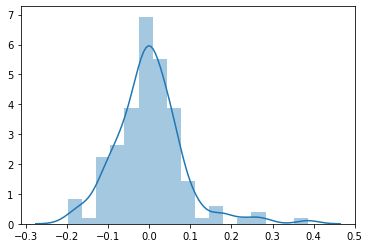

In [49]:
sns.distplot(res)

# Shape of errors are close to normal distributon

## Prediction and Evaluation

In [50]:
df_test[num_var]  = scaler.transform(df_test[num_var])

In [51]:
y_test = df_test.pop("price")
X_test = df_test

In [58]:
# selecting features in test using feature set
X_train_p = X_train_model14.drop(["const"],axis=1)

X_test_sm_selected =X_test_sm[X_train_p.columns]
X_test_sm_selected = sm.add_constant(X_test_sm_selected)
X_test_sm_selected.head()

,const,enginelocation,carwidth,boreratio,compressionratio,horsepower,carbody_hatchback,enginetype_ohc,cylindernumber_four
160,1.0,1,0.341667,0.404762,0.12500,0.091667,0,1,1
186,1.0,1,0.433333,0.404762,0.12500,0.154167,0,1,1
59,1.0,1,0.516667,0.563492,0.10000,0.150000,1,1,1
165,1.0,1,0.308333,0.444444,0.15000,0.266667,0,0,1
140,1.0,1,0.291667,0.746032,0.10625,0.104167,1,0,1


In [59]:
X_test_sm_selected.describe()

,const,enginelocation,carwidth,boreratio,compressionratio,horsepower,carbody_hatchback,enginetype_ohc,cylindernumber_four
count,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,1.0,0.967742,0.480376,0.556580,0.209375,0.248858,0.338710,0.806452,0.854839
std,0.0,0.178127,0.165440,0.228484,0.273690,0.163376,0.477134,0.398304,0.355139
min,1.0,0.000000,0.183333,-0.111111,0.000000,0.016667,0.000000,0.000000,0.000000
25%,1.0,1.000000,0.358333,0.404762,0.093750,0.107292,0.000000,1.000000,1.000000
50%,1.0,1.000000,0.441667,0.563492,0.125000,0.218750,0.000000,1.000000,1.000000
75%,1.0,1.000000,0.516667,0.746032,0.150000,0.295833,1.000000,1.000000,1.000000
max,1.0,1.000000,0.975000,0.888889,1.000000,0.662500,1.000000,1.000000,1.000000


In [60]:
# predict
y_test_pred = lm_14.predict(X_test_sm_selected)

In [62]:
# calculating the r2 score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8064604894960371